# Gait planning 1423

Robótica Avanzada 2021-2 **UTEC**

Joaquín **Cornejo** - Raul **Escandón**

## 0. Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy.matrices import Matrix
import sympy as sp

import copy as cp

## 1. Funciones

In [2]:
def axValues(A,B,axis):
    if axis == 0:
        return [A[0],B[0]]
    else:
        return [A[1],B[1]]
    
#Calculate distances

def pointDistance(A,B):
    return np.linalg.norm(B-A)

#Calculate Incenter

def pointIncenter(A,B,C):
    
    da = pointDistance(B,C)
    db = pointDistance(C,A)
    dc = pointDistance(A,B)
    
    p = da+db+dc
    Ox = (da*A[0] + db*B[0] + dc*C[0])/p
    Oy = (da*A[1] + db*B[1] + dc*C[1])/p
    
    O = np.array([Ox,Oy])
    
    return O

#Forward movement, only in axis X

def gaitCheetah(step,n,x0):
    vectorL1 = np.zeros((n,2))
    vectorL2 = np.zeros((n,2))
    vectorL3 = np.zeros((n,2))
    vectorL4 = np.zeros((n,2))
    vectorCt = np.zeros((n,2))
    
    x = cp.copy(x0)
    
    for i in range(n):
        index = i % 4
        
        legCurrent = x[index]
        xs = np.array([legCurrent[0] + step, legCurrent[1]])  
        
        x[index] = xs
        
        
        if index == 0:
            vectorL4[i] = xs   #L4
            vectorL1[i] = x[1] #L1
            vectorL2[i] = x[2] #L2
            vectorL3[i] = x[3] #L3
            
            vectorCt[i] = pointIncenter(x[1],x[2],x[3])
            
        elif index == 1:
            vectorL4[i] = x[0]
            vectorL1[i] = xs
            vectorL2[i] = x[2]
            vectorL3[i] = x[3]

            vectorCt[i] = pointIncenter(x[0],x[2],x[3])
            
        elif index == 2:
            vectorL4[i] = x[0]
            vectorL1[i] = x[1]
            vectorL2[i] = xs
            vectorL3[i] = x[3]
            
            vectorCt[i] = pointIncenter(x[0],x[1],x[3])
            
        elif index == 3:
            vectorL4[i] = x[0]
            vectorL1[i] = x[1]
            vectorL2[i] = x[2]
            vectorL3[i] = xs
            
            vectorCt[i] = pointIncenter(x[0],x[1],x[2])
            
            
        
    return vectorL1, vectorL2, vectorL3, vectorL4, vectorCt    
    
def plotting(L1,L2,L3,L4,index):
    
    limits = [0, 4, 0, 2.5]
    
    if index == 0:
        
        plt.plot(axValues(L1,L2,0),axValues(L1,L2,1))
        plt.plot(axValues(L2,L3,0),axValues(L2,L3,1))
        plt.plot(axValues(L3,L1,0),axValues(L3,L1,1))
        
        plt.plot(L1[0],L1[1],"ro")
        plt.plot(L2[0],L2[1],"go")
        plt.plot(L3[0],L3[1],"co")
        plt.plot(L4[0],L4[1],"m>")
        plt.plot(O[0],O[1],"ko")
        plt.plot(0.8,1,"k,")
        plt.plot(4,1,"k,")
        
        
        plt.axis(limits)
        
        plt.axis('equal')
        plt.grid()
        plt.show()
        
    elif index == 1:
        
        plt.plot(axValues(L2,L4,0),axValues(L2,L4,1))
        plt.plot(axValues(L4,L3,0),axValues(L4,L3,1))
        plt.plot(axValues(L3,L2,0),axValues(L3,L2,1))
        
        plt.plot(L1[0],L1[1],"r>")
        plt.plot(L2[0],L2[1],"go")
        plt.plot(L3[0],L3[1],"co")
        plt.plot(L4[0],L4[1],"mo")
        plt.plot(O[0],O[1],"ko")
        plt.plot(0.8,1,"k,")
        plt.plot(4,1,"k,")
        
        plt.axis(limits)

        plt.axis('equal')
        plt.grid()
        plt.show()
        
    elif index == 2:
        plt.plot(axValues(L1,L4,0),axValues(L1,L4,1))
        plt.plot(axValues(L4,L3,0),axValues(L4,L3,1))
        plt.plot(axValues(L3,L1,0),axValues(L3,L1,1))
        
        plt.plot(L1[0],L1[1],"ro")
        plt.plot(L2[0],L2[1],"g>")
        plt.plot(L3[0],L3[1],"co")
        plt.plot(L4[0],L4[1],"mo")
        plt.plot(O[0],O[1],"ko")
        plt.plot(0.8,1,"k,")
        plt.plot(4,1,"k,")
        
        plt.axis(limits)

        plt.axis('equal')
        plt.grid()
        plt.show()
        
    elif index == 3:
        plt.plot(axValues(L1,L2,0),axValues(L1,L2,1))
        plt.plot(axValues(L2,L4,0),axValues(L2,L4,1))
        plt.plot(axValues(L4,L1,0),axValues(L4,L1,1))
        
        plt.plot(L1[0],L1[1],"ro")
        plt.plot(L2[0],L2[1],"go")
        plt.plot(L3[0],L3[1],"c>")
        plt.plot(L4[0],L4[1],"mo")
        plt.plot(O[0],O[1],"ko")
        plt.plot(0.8,1,"k,")
        plt.plot(4,1,"k,")
        
        plt.axis(limits)

        plt.axis('equal')
        plt.grid()
        plt.show()
    

## 2. Resultados

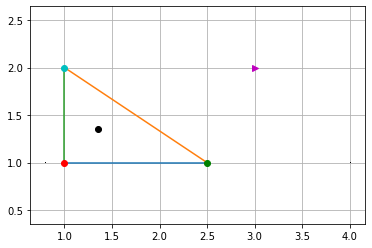

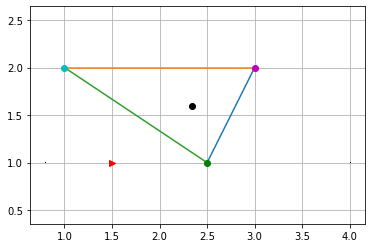

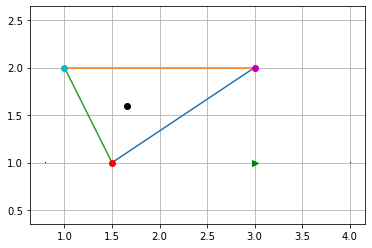

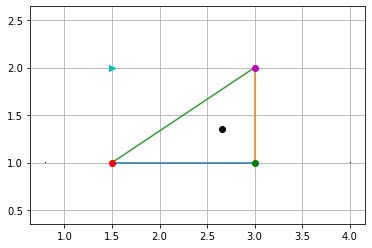

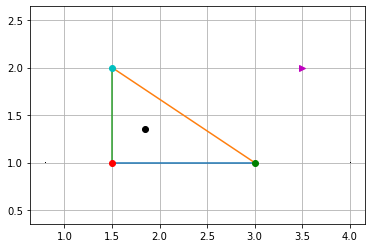

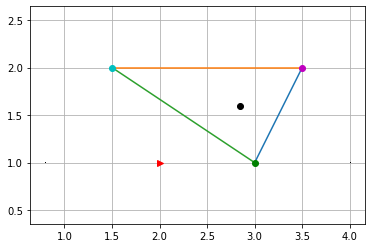

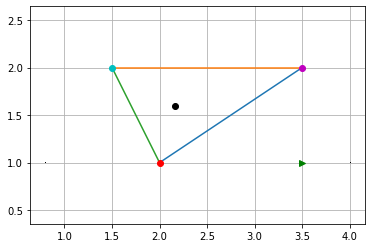

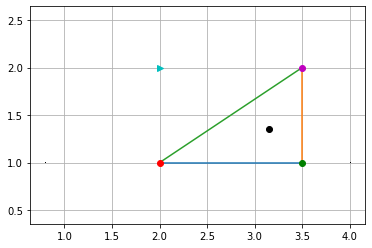

In [3]:
#Define legs position

L1 = np.array([1   ,1])
L2 = np.array([2.5   ,1])
L3 = np.array([1   ,2])
L4 = np.array([2.5 ,2])

#Gait sequence 4 - 1 - 2 -3

x0 = np.vstack((L4,L1,L2,L3))

#Steps
n = 8

vectorL1,vectorL2,vectorL3,vectorL4,vectorCt= gaitCheetah(0.5, n, x0)

for i in range(n):
    L1 = vectorL1[i]
    L2 = vectorL2[i]
    L3 = vectorL3[i]
    L4 = vectorL4[i]
    O  = vectorCt[i]
    
    index = i % 4
    
    plotting(L1,L2,L3,L4,index)
    
    
    